### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

## Reading DataSet

In [2]:
df=pd.read_excel('default of credit card clients.xls',header=1) #first row as a header as it turns all the dataset to objects

In [3]:
#shuffling data
df = df.sample(frac=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10852,10853,80000,female,university,single,23,0,0,0,0,...,21808,15995,12290,2427,1214,600,656,282,0,1
9288,9289,150000,female,graduate school,single,40,-1,-1,-1,-1,...,0,0,0,1819,1012,0,0,0,0,1
5565,5566,240000,female,graduate school,married,43,0,-1,-1,-2,...,0,0,0,3220,0,0,0,0,0,0
18631,18632,110000,female,university,single,26,-1,-1,-1,-1,...,922,3509,1979,400,300,922,3509,0,5192,1
4987,4988,50000,female,university,single,24,0,0,0,0,...,17956,18091,18259,1300,5869,1000,795,1000,1000,0


In [4]:
#df.columns= df.iloc[0]
#df.drop(df.index[0],inplace=True)

In [5]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

## Exploratory Data Analysis

In [6]:
print('shape of the Dataset is: ',df.shape)
df.head()

shape of the Dataset is:  (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10852,10853,80000,female,university,single,23,0,0,0,0,...,21808,15995,12290,2427,1214,600,656,282,0,1
9288,9289,150000,female,graduate school,single,40,-1,-1,-1,-1,...,0,0,0,1819,1012,0,0,0,0,1
5565,5566,240000,female,graduate school,married,43,0,-1,-1,-2,...,0,0,0,3220,0,0,0,0,0,0
18631,18632,110000,female,university,single,26,-1,-1,-1,-1,...,922,3509,1979,400,300,922,3509,0,5192,1
4987,4988,50000,female,university,single,24,0,0,0,0,...,17956,18091,18259,1300,5869,1000,795,1000,1000,0


In [7]:
print('Columns types and lengths: ',df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 10852 to 2798
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null 

- Marriage and Education columns has null values.

In [8]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- it seems that AGE has some outliers as the maximum of the column is 267 years.
- bill amount for some records is -ve which may be a debited amount which may be acceptable.
- pay status has values of -2 as minimum value which is not described in the dataset info.

In [9]:
for column in df.select_dtypes(include=['object']).columns:
       print('cross table for: ',column)
       display(pd.crosstab(index=df[column],
                           columns='Numbers'))

cross table for:  SEX


col_0,Numbers
SEX,
female,18112
male,11888


cross table for:  EDUCATION


col_0,Numbers
EDUCATION,
0,14
graduate school,10585
high school,4916
others,124
university,14030


cross table for:  MARRIAGE


col_0,Numbers
MARRIAGE,
0,54
married,13659
single,15964


- we have null values in education and marital status
- marriage and education has records with 0 values, also not described in the info and has no meaning.

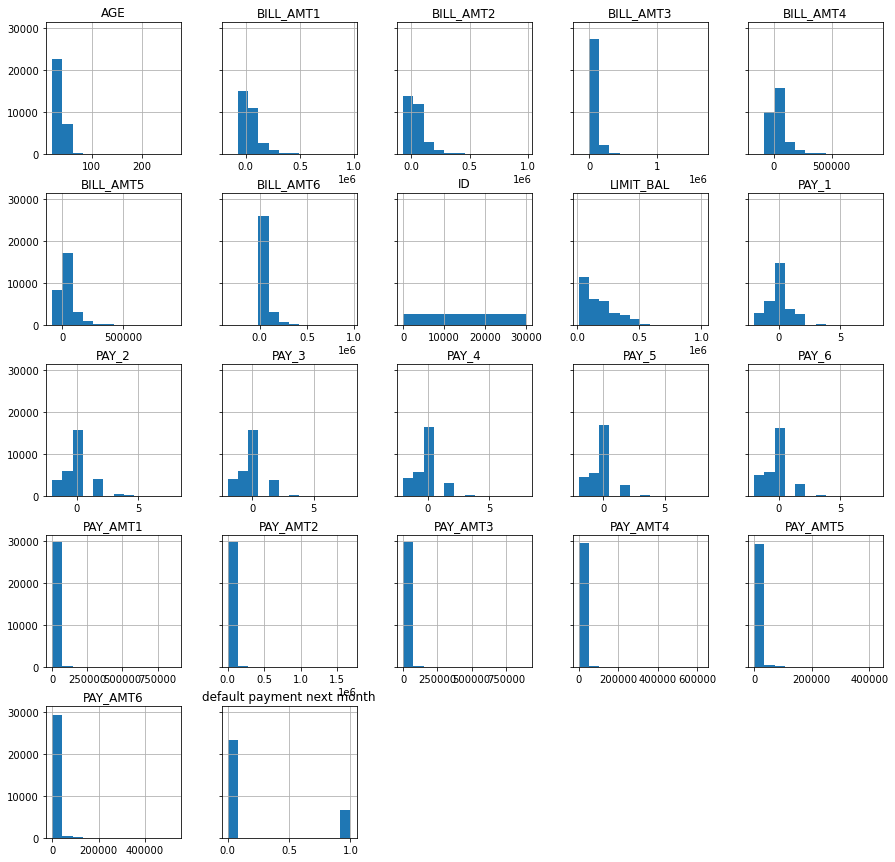

In [10]:
##### for column in df.select_dtypes(exclude=['object']).columns:
#        print('Histogram for: ',column)
#        plt.hist(df[column],bins=10)
#        plt.xlabel(column)
#        plt.show()

hist = df.hist(bins=12,sharey=True, figsize=(15, 15))

###### conclusions:

- Most of the customers are under 50 years.
- From payment status it appears that there is status of -2 and 0 not mentioned in the description of the dataset,
  but after invistigation it was found that -2: is a status for not using the balance in this month, 0: for revolved usage.
- From the bill amounts there are some customers which accounts are debited for some months with balance (-).
- data might be insufficient because the default percentage over all is about 20% of dataset.

box plot for:  ID


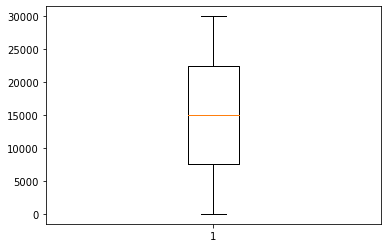

box plot for:  LIMIT_BAL


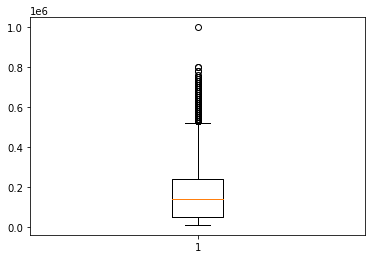

box plot for:  AGE


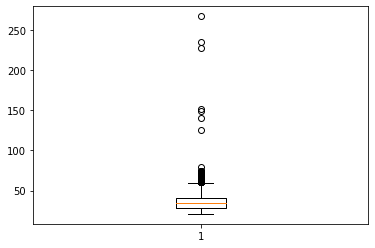

box plot for:  PAY_1


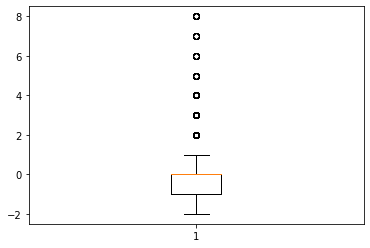

box plot for:  PAY_2


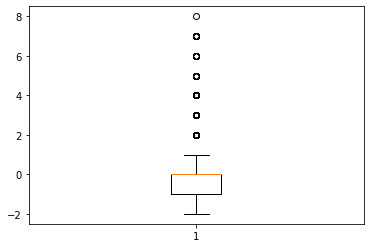

box plot for:  PAY_3


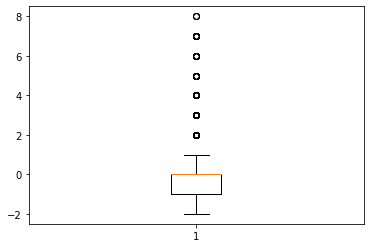

box plot for:  PAY_4


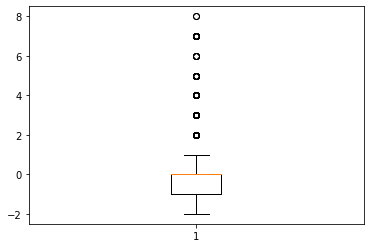

box plot for:  PAY_5


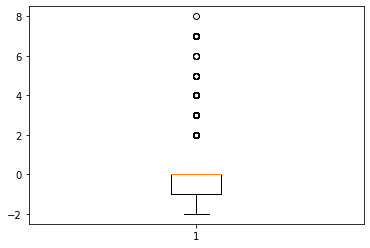

box plot for:  PAY_6


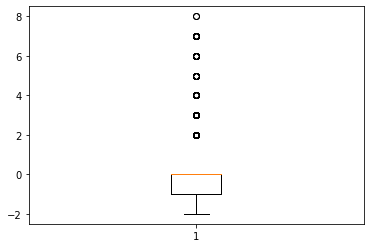

box plot for:  BILL_AMT1


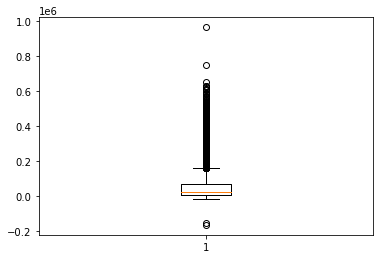

box plot for:  BILL_AMT2


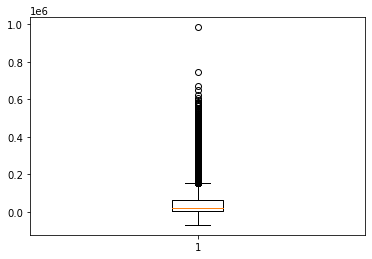

box plot for:  BILL_AMT3


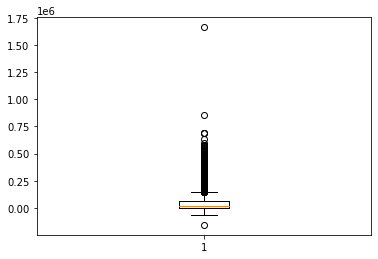

box plot for:  BILL_AMT4


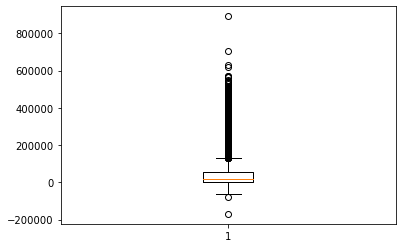

box plot for:  BILL_AMT5


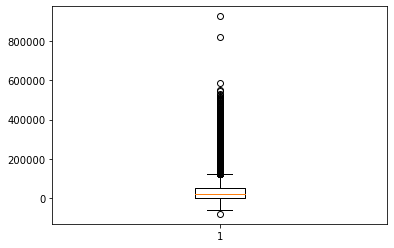

box plot for:  BILL_AMT6


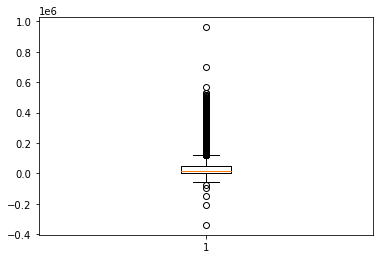

box plot for:  PAY_AMT1


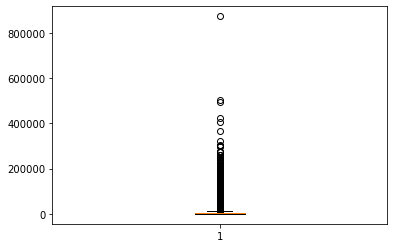

box plot for:  PAY_AMT2


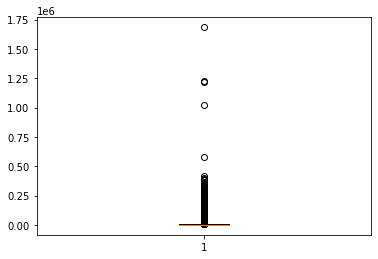

box plot for:  PAY_AMT3


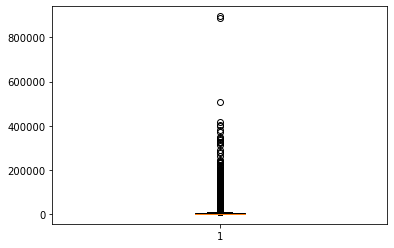

box plot for:  PAY_AMT4


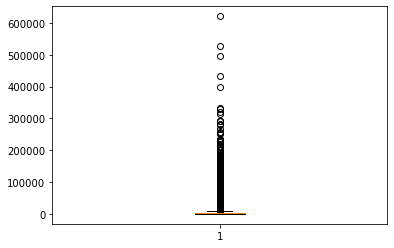

box plot for:  PAY_AMT5


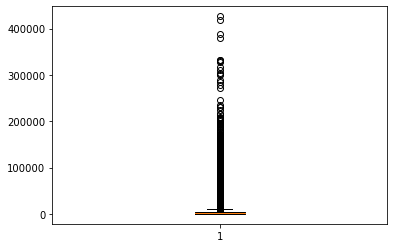

box plot for:  PAY_AMT6


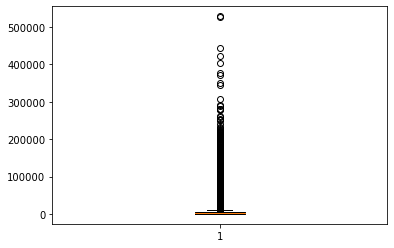

box plot for:  default payment next month


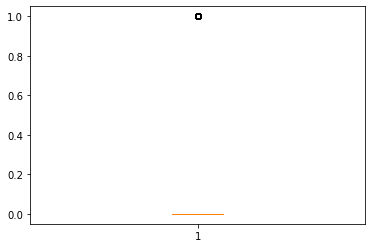

In [11]:
# Box plot for outliers

# for column in df.columns:
#     if df[column].dtypes!='object':
#        print('box plot for: ',column)
#        plt.boxplot(df[column])
#        plt.show()
        
for column in df.select_dtypes(exclude=['object']).columns:
       print('box plot for: ',column)
       plt.boxplot(df[column])
       plt.show()

- there are some outliers in the AGE column
- From the bill amounts there are some customers which accounts are debited for some months with balance (-).
- From the box plot also appears that most of the cases are classified as not default.

In [12]:
#might be a good idea to replace 0 values in Education with others value.
df['EDUCATION']=df['EDUCATION'].replace([0],'others')
display(pd.crosstab(index=df['EDUCATION'],columns='Numbers'))

col_0,Numbers
EDUCATION,
graduate school,10585
high school,4916
others,138
university,14030


In [13]:
#delete from marraige where values equal 0.
df.drop(df[df['MARRIAGE']==0].index,inplace=True)
display(pd.crosstab(index=df['MARRIAGE'],columns='Numbers'))

col_0,Numbers
MARRIAGE,
married,13659
single,15964


In [14]:
#replacing values of Age coulm which are more that 120 years to the average value of the column

# df_test['AGE']=df_test['AGE'].replace([df_test['AGE']>130],df_test['AGE'].mean())
# df_test.loc[df_test['AGE'] > 130] = df['AGE'].mean()
df['AGE']=np.where(df['AGE'] > 120, df['AGE'].mean(), df['AGE'])

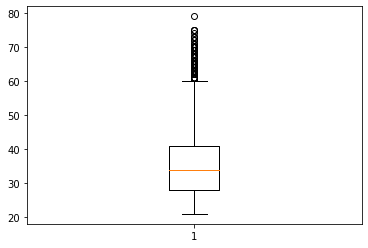

In [15]:
plt.boxplot(df['AGE'])
plt.show()

In [16]:
#Drop dublications
df.drop_duplicates(inplace=True)
#drop ID as it has no affect on predection.
df.drop(['ID'],axis=1,inplace=True)
#drop the coulmns with missing values and print the new shape
df.dropna(inplace=True)
# print('Number of new records {},Percent of deleted rows: {}%'.format(df.shape[0],(100-(df.shape[0]/30000)*100)))
df.shape

(29297, 24)

Text(0.5, 1.0, 'dataset correlation')

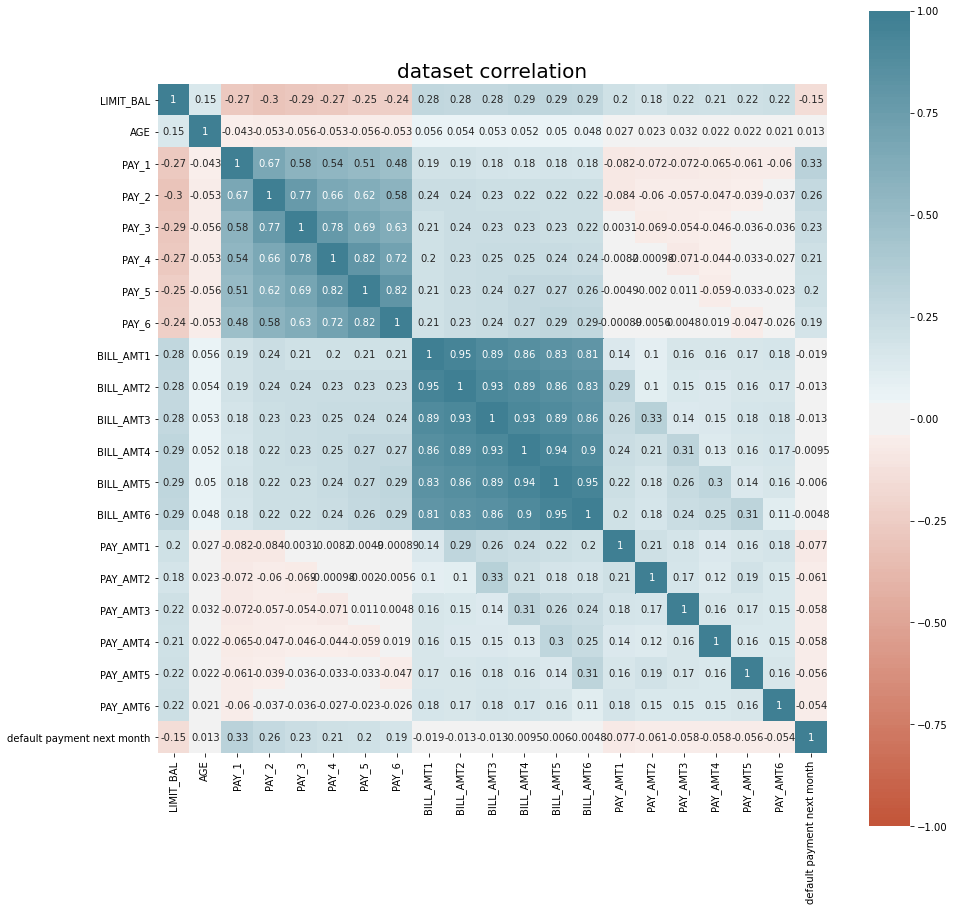

In [17]:
# Display correlation after removing correlated features
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
dc=sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20,220, n=200)
                   ,square=True,annot=True)
dc.set_title(label='dataset correlation', fontsize=20)

##### corrolation is high between bill amounts and i think it  should not be excluded or dropped.

# Spliting DataSets

In [19]:
train_data, test_data= sk.model_selection.train_test_split(df,test_size=0.2,random_state=30,shuffle=True)
# valid_data, test_data= sk.model_selection.train_test_split(test_data,test_size=0.5,random_state=30,shuffle=True)
print('train_data:{} test_data:{}'.format(train_data.shape[0],test_data.shape[0]))

train_data:23437 test_data:5860


# preparing Model data

In [20]:
#onehot encoding using get_dummies()
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)
# valid_data=pd.get_dummies(valid_data)

# Train the Model

In [25]:
# Labels are the values we want to predict
train_labels = np.array(train_data['default payment next month'])
test_labels = np.array(test_data['default payment next month'])

# Remove the labels from the features
# axis 1 refers to the columns
train_features= train_data.drop('default payment next month', axis = 1)
test_features= test_data.drop('default payment next month', axis = 1)

# Saving feature names for later use
feature_list = list(train_features.columns)

# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

# we will be using random forest classifier 
RF=RandomForestClassifier(n_estimators=100)

#### training job

In [26]:
RF.fit(train_features,train_labels)

RandomForestClassifier()

#### Testing job

In [27]:
predections=RF.predict(test_features)

# Evaluate the Model

In [28]:
print('Accuracy: ',sk.metrics.accuracy_score(test_labels,predections))

Accuracy:  0.818259385665529


In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels,predections)
cm

array([[4328,  253],
       [ 812,  467]], dtype=int64)

In [38]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

Text(0.5, 15.0, 'Predicted')

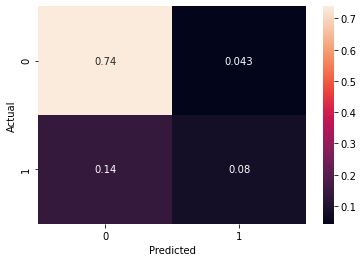

In [49]:
sns.heatmap(cm/np.sum(cm), annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [37]:
class_rep=classification_report(test_labels,predections,labels=[1,0])
print('classification report: \n',class_rep)

classification report: 
               precision    recall  f1-score   support

           1       0.65      0.37      0.47      1279
           0       0.84      0.94      0.89      4581

    accuracy                           0.82      5860
   macro avg       0.75      0.65      0.68      5860
weighted avg       0.80      0.82      0.80      5860



In [32]:
from sklearn.metrics import f1_score
f1_score(test_labels,predections)

0.46723361680840425

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(test_labels,predections)

0.6549504454524492

In [40]:
fpr, tpr, thresh = roc_curve(test_labels,predections, pos_label=1)

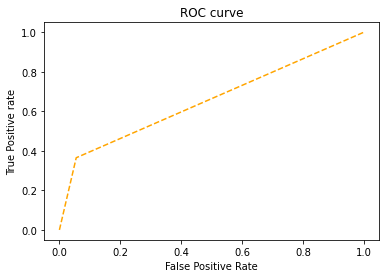

In [44]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='ROC')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show();